Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [14]:
NAME = "Mayank Dahiya"
COLLABORATORS = "W3 Schools , GeeksforGeeks"

---

## CSL2050: Pattern Recognition and Machine Learning<br>
Programming Assignment-2<br>
Spring 2025<br>

---
## KNN Classification
In this assignment, we will implement K-nearest neighbour for Handwritten Digit Classification problem. For handwritten digit classification problem, we shall use a small subset of MNIST Dataset.

KNN algorithm has three important modules: (i) Distance Computation and (ii) Finding K nearest neigbour to a point, (iii) Predicting the label for a test point. Let us first implement them.

**Problem 1.01:** Write a function to compute distance between two points. The function should compute either Eucleadean or Manhattan distance based on the argument passed in the function. (2 points)

In [15]:
import math
def calDist(x,y,metric):
    """Compute the distance (either euclidean or manhattan)

    """
    if metric=='euclidean':   #If metric is Euclidean , it will calculate the euclidean distance.
      dist = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)])) # Formula of Euclidean distance
      return dist
    elif metric=='manhattan':   #If metric is manhattan , it will calculate the manhattan distance
      return sum([abs(a - b) for a, b in zip(x, y)])   # Formula of manhattan distance

Your function should print a value exactly or close to (with absolute tolerance = 0.01) 1.41 for calDist([1,1],[0,0],'euclidean').
Your function should print a value exactly or close to (with absolute tolerance = 0.01) 3 for calDist([1,1],[0,0],'manhatten').
It should support higher dimension inputs.

In [16]:
calDist([1,1],[0,0],'euclidean')

1.4142135623730951

In [17]:
calDist([1,1],[0,0],'manhattan')

2

In [18]:
calDist([1,1,2],[0,0,1],'manhattan')

3

In [19]:
"""Check that calDist returns the correct output for several inputs"""
import math
assert math.isclose(calDist([1,1],[0,0],'euclidean'), 1.414, abs_tol=0.01)
assert math.isclose(calDist([1,1],[0,0],'manhattan'), 2, abs_tol=0.01)
assert math.isclose(calDist([1,1,2],[0,0,1],'manhattan'), 3, abs_tol=0.01)

**Problem-1.02:** Write a function that returns the k nearest neighbors to a given point from a set of points, along with their corresponding indices in the set.

In [20]:
import numpy as np

def k_nearest_neighbors(p, points, k, metric):
    """
    Finds the k nearest neighbors of point `p` in the dataset `points` using the specified distance metric.

    Parameters:
    - p (list): The point (e.g., [x1, y1, z1, ...]).
    - points (list of lists): The set of points (e.g., [[x1, y1, z1], [x2, y2, z2], ...]).
    - k (int): The number of nearest neighbors to find.
    - metric (str): The distance metric, either 'euclidean' or 'manhattan'.

    Returns:
    - list: A list of the k nearest neighbors (each neighbor is a list representing a point)
            and their index in `points`.

    """
    if metric not in ['euclidean', 'manhattan']:  #If metric is not any one of this string , it will raise a error
        raise ValueError("Invalid distance metric. Use 'euclidean' or 'manhattan'.")

    if metric == 'euclidean':  #If metric is euclidean , it will calculate the euclidean distance
        distances = [(calDist(p, point, 'euclidean'), idx) for idx, point in enumerate(points)]
        nearest_indices = [idx for dist, idx in sorted(distances)[:k]]  # Sort the distances and taking k indices
        nearest_neighbors = [points[idx] for idx in nearest_indices]  # Collecting the value of numbers in respective k indices
        return nearest_neighbors, nearest_indices
    elif metric == 'manhattan':  #If metric is manhattan , it will calculate the manhattan distance
        distances = [(calDist(p, point, 'manhattan'), idx) for idx, point in enumerate(points)]
        nearest_indices = [idx for dist, idx in sorted(distances)[:k]]  # Sort the distances and taking k indices
        nearest_neighbors = [points[idx] for idx in nearest_indices]  # Collecting the values in respective k indices.
        return nearest_neighbors, nearest_indices


In [21]:
points = [[1, 2], [3, 4], [5, 6], [7, 8], [2, 3], [6, 7]]
query_point = [1, 2]
k = 3
a,b=k_nearest_neighbors(query_point, points, k, 'euclidean')
print(a)
print(b)

[[1, 2], [2, 3], [3, 4]]
[0, 4, 1]


In [22]:
points = [[1, 2], [3, 4], [5, 6], [7, 8], [2, 3], [6, 7]]
query_point = [6, 7]
k = 3
a,b=k_nearest_neighbors(query_point, points, k, 'manhattan')
print(a)
print(b)

[[6, 7], [5, 6], [7, 8]]
[5, 2, 3]


In [23]:
"""Check that k_nearest_neighbors returns the correct output for several inputs using hidden test cases"""

'Check that k_nearest_neighbors returns the correct output for several inputs using hidden test cases'

**Problem-1.03**: Write a function that predicts the labels for validation data using the K-Nearest Neighbors (KNN) algorithm. The function should take the following arguments:

    X_train: A numpy array of feature data for training.
    y_train: A numpy array of labels for the training data.
    testPoint: A single validation or test data sample to predict the label for.
    k: The number of nearest neighbors to consider for the prediction.
    distance_metric: The type of distance metric to use ('euclidean' or 'manhattan').

The function should return the predicted labels for the validation data sample based on the KNN algorithm.

In [24]:
import numpy as np

def knn_predict(X_train, y_train, testPoint, k, distance_metric='euclidean'):
  """
  Predicts labels for validation data using the K-Nearest Neighbors algorithm.

  Args:
    X_train: Training data features (numpy array).
    y_train: Training data labels (numpy array).
    testPoint: Validation or test data sample (numpy array).
    k: Number of nearest neighbors to consider.
    distance_metric: Distance metric to use ('euclidean' or 'manhattan').

  Returns:
    predictions: List of predicted labels for the validation data.
  """
  predictions=[]     # Creates an empty list
  a,b=k_nearest_neighbors(testPoint, X_train, k, distance_metric)  # Calling the k_nearest_neighbour function to find
  #Distance of the k-nearest neighbor from the testPoint and Indices of the k-nearest neighbor in X_train
  unique, counts = np.unique(y_train[b], return_counts=True) # Extracts the labels of the k-nearest neighbors from y_train using indices b
  index = counts.argmax()  # Finds the index of the most frequent label using argmax()
  predictions.append(unique[index]) # Add the most occured label to the prediction list.
  return predictions

  for i in tqdm(range(len(X_val))):
    # Pass the entire data point (X_val[i]) to knn_predict
    predictions.append(knn_predict(X_train, y_train, X_val[i], k, 'euclidean')[0])  # extract the prediction from the list



# Example usage:
# Assuming you have functions for k_nearest_neighbors and necessary imports
#X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]])
#y_train = np.array([0, 0, 1, 1, 1])  # Labels for the training data
#testPoint = np.array([2, 2])  # Test point for prediction
#k = 3  # Number of neighbors
#predicted_label = knn_predict(X_train, y_train, testPoint, k, 'euclidean')

In [25]:
"""Check that knn_predict returns the correct output for several inputs using hidden test cases"""


'Check that knn_predict returns the correct output for several inputs using hidden test cases'

Now, we shall use our learning for classifying handwritten digits into one of the classes (0 to 9). Complete the following code so that accuracy on validation data can be computed. You should use knn_predict function you have already written to complete this.

**Problem-1.04**: Review the provided code and complete it by invoking the knn_predict function for each sample in the validation dataset. The predictions list should store the predicted labels for each sample in the validation set.

In [26]:
!pip install tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Step 1: Load the mnist_student.csv dataset
# Load the data from the provided mnist_student.csv file
data = pd.read_csv('mnist_student.csv')

# Separate features (X) and labels (y)
X = data.drop('label', axis=1)  # Features (28x28 pixel images flattened)
y = data['label']  # Labels

# Normalize the pixel values to be between 0 and 1
X = X / 255.0

# Step 2: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
X_train=X_train.values
y_train=y_train.values
X_val=X_val.values
y_val=y_val.values
k=7      # Defining the k value
predictions=[]

## Complete this code by calling knn_predict for each sample of validation data and
## predictions should store predicted labels for each of the validation set samples
# YOUR CODE HERE
for i in tqdm(range(len(X_val))):
   predictions.append(knn_predict(X_train, y_train, X_val[i], k, 'euclidean'))

# Compute accuracy on validation set
accuracy = accuracy_score(y_val, predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# You can also display some images and their predicted labels here


100%|██████████| 200/200 [00:52<00:00,  3.84it/s]

Validation Accuracy: 87.50%


Next, we provide you a helper code that you can use to visualize the result of your implementation. It will randomly choose 5 samples from validation set and show true (actual) and predicated labels.

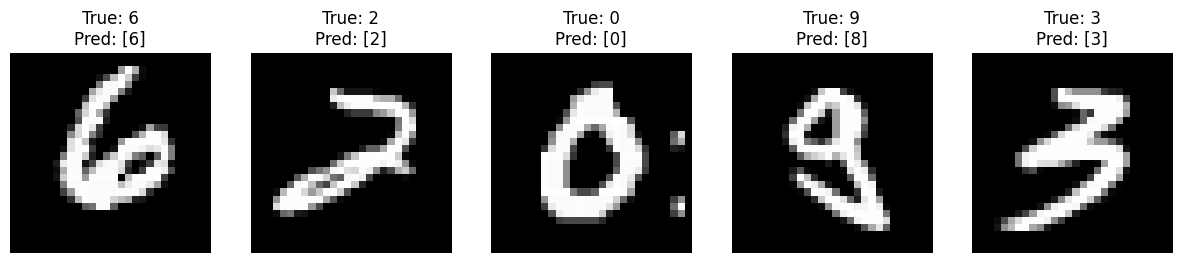

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `predictions` is the list of predicted labels for the validation set

# Step 3: Display some of the predicted samples
def plot_samples(X_val, y_val, predictions, num_samples=5):
    # Randomly select `num_samples` to display
    random_indices = np.random.choice(len(X_val), size=num_samples, replace=False)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        # Get the sample image (reshape from 1D array to 28x28)
        img = X_val[idx].reshape(28, 28)
        true_label = y_val[idx]
        predicted_label = predictions[idx]

        # Plot the image
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}")
        axes[i].axis('off')

    plt.show()

# Call the function to display 5 random samples
plot_samples(X_val, y_val, predictions, num_samples=5)


Review, understand and try out this code which draws confusion matrix on validation set.

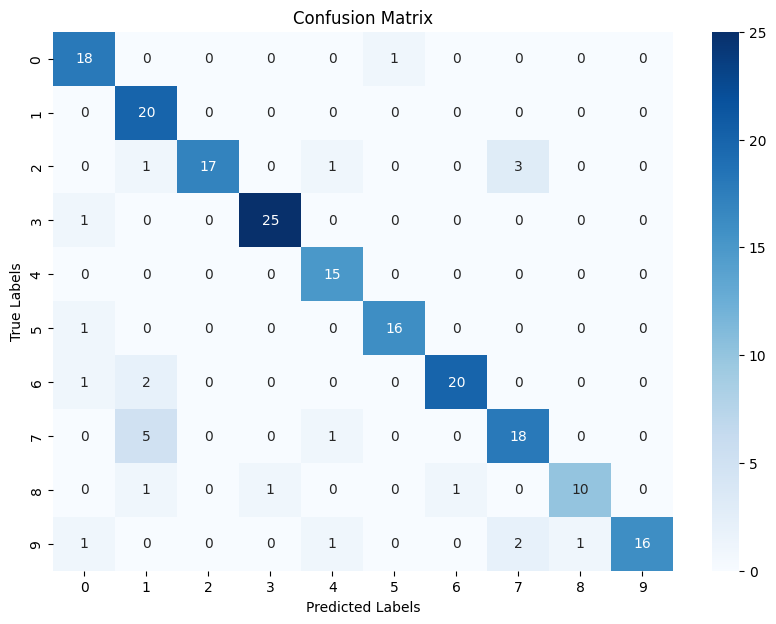

In [28]:
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming `predictions` contains the predicted labels and `y_val` contains the true labels

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_val, predictions)

# Step 2: Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Step 3: Get class names (if not already available)
class_names = [str(i) for i in range(10)]  # For MNIST dataset (digits 0-9)

# Step 4: Call the function to plot the confusion matrix
plot_confusion_matrix(cm, class_names)


**Problem-1.05:** What value of k gave you best validation accuracy. How many values you tried?

The Best validation accuracy was at k = 7.  I hvae tried for the following values of k. (k=1,2,3,4,5,6,7,8,9,10)

**Problem-1.06:** Write your observation about failure cases from visual inspection of results.

9 was misreaded as 8 because both have almost same alignments.

**Problem-1.07:** What did you observe from the confusion matrix?

I observed the following things from the confusion matrix:

-> Three values labeled as 2 were predicted as 7 and two values labeled as 7 were predicated as 2.

-> Five values labeled as 7 were predicted as 1.

-> Two values labeled as 6 were predicted as 1.

-> Two values labeled as 9 were predicted as 7.

-> And for other values, most of the predictions were correct but for some
   cases,only one labeled value was predicted wrong.

**Problem-1.08:** For a fix k, which distance metric gave you better result?

For a fixed value of k , Euclidean distance gave better results.

**Problem-1.09:** How did you handle ties in the k-NN algorithm? For instance, if the three nearest neighbors belong to three different classes, how is the final prediction determined? Which part of your code addresses this issue? Please point it out.

If the three nearest neighbours belong to three different classes , then the class that appears most frquently among those neighbours will be the prediction.

This part of the function adresses the issue:

unique, counts = np.unique(y_train[b], return_counts=True)

  index = counts.argmax()

  predictions.append(unique[index])

**Problem-1.10: Ethical Reflection and Acknowledgments (Mandatory Question)**
(i) List all collaborators, references, or resources you used. If none, write "NA."

(ii) Estimate the percentage of the code you wrote yourself.

(iii) Reflect on your ethical practices (Yes/No):

    (a) Did you avoid copying code without understanding it?
    (b) Did you properly cite all resources and collaborators?
        

(i) W3Schools , GeeksforGeeks

(ii) 60-70%

(iii)
(a) Yes , I tried to avoid copying code , rather i would find some articles in GeeksforGeeks and W3 Schools if i faced some problems.

(b) Yes